<a href="https://colab.research.google.com/github/bcaffo/ds4ph-bme/blob/master/notebooks/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we'll build an autoencoder to model the cryptopunks. We'll assume that you've already looked at the chapter on convolutional networks, where we show how we downloaded and process the data.

In [2]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np

Import the image of all of the cryptopunks. Note, the image conversion sets the background to black, which has the negative effect of blending into some of the figure's black hair. 

In [5]:
imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
imgArray = np.asarray(img)

Reorder the array. I couldn't get reshape to do this right, but I think this is a one-line command waiting to happen. See if you can figure out a better way. All images are 24x24x3 and there's 10,000 punks. (Supposedly, there will only ever be 10k punks.)


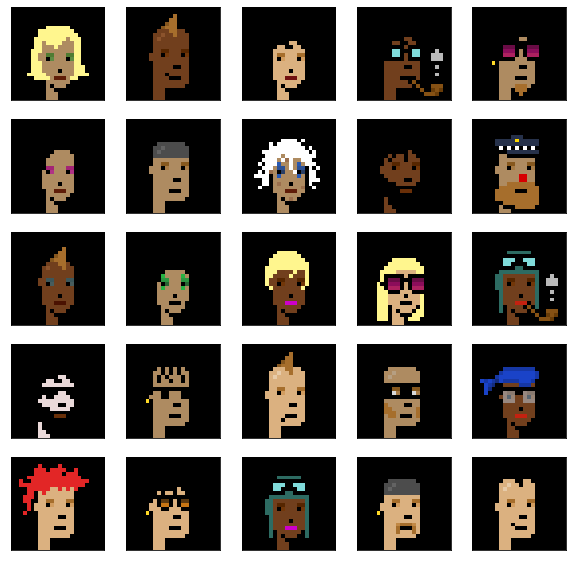

In [7]:
finalArray = np.empty((10000, 24, 24, 3))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[idx,:,:,:] = imgArray[a:b,c:d,:]

## double check with above
## apparently the .astype('uint8') is needed to display correctly now
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(finalArray[i,:,:,:].astype('uint8'))
plt.show()

Let's normalize our array and split it into testing and training data.

In [ ]:
n = finalArray.shape[0]
trainFraction = .75
sample = np.random.uniform(size = n) < trainFraction
x_train = finalArray[ sample, :, :, :] / 255
x_test =  finalArray[~sample, :, :, :] / 255
[x_train.shape, x_test.shape]

[(7538, 24, 24, 3), (2462, 24, 24, 3)]

Now let's create our encoder/decoder. Here we're going to use a simple approach for just flattening the images, one dense layer, they decoding.

In [ ]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        

In [ ]:
autoED = tf.keras.Sequential()
autoED.add(layers.InputLayer(input_shape=(24, 24, 3)))
autoED.add(layers.Flatten())
autoED.add(layers.Dense(64, activation='relu'))
autoED.add(layers.Dense(1728, activation='sigmoid'))
autoED.add(layers.Reshape(target_shape = (24, 24, 3)))
autoED.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoED.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                110656    
_________________________________________________________________
dense_3 (Dense)              (None, 1728)              112320    
_________________________________________________________________
reshape_1 (Reshape)          (None, 24, 24, 3)         0         
Total params: 222,976
Trainable params: 222,976
Non-trainable params: 0
_________________________________________________________________


Here's what you get if you run some of the test images through the initialized weights.

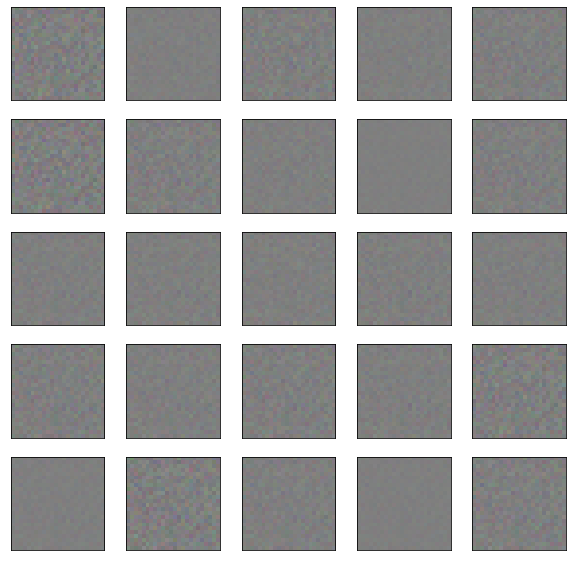

In [ ]:
test = autoED(x_test[0 : 25,:,:,:])
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test[i,:,:,:])

OK, now let's update the weights.

In [ ]:
autoED.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
236/236 [==============================] - 2s 7ms/step - loss: 0.0634 - val_loss: 0.0174
Epoch 2/10
236/236 [==============================] - 1s 6ms/step - loss: 0.0154 - val_loss: 0.0105
Epoch 3/10
236/236 [==============================] - 1s 6ms/step - loss: 0.0095 - val_loss: 0.0075
Epoch 4/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 5/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 6/10
236/236 [==============================] - 1s 6ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 7/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 8/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/10
236/236 [==============================] - 1s 5ms/step - loss: 0.0025 - val_loss: 0.0023

Let's revisualize the first 25 test images with the new encoder/decoder.

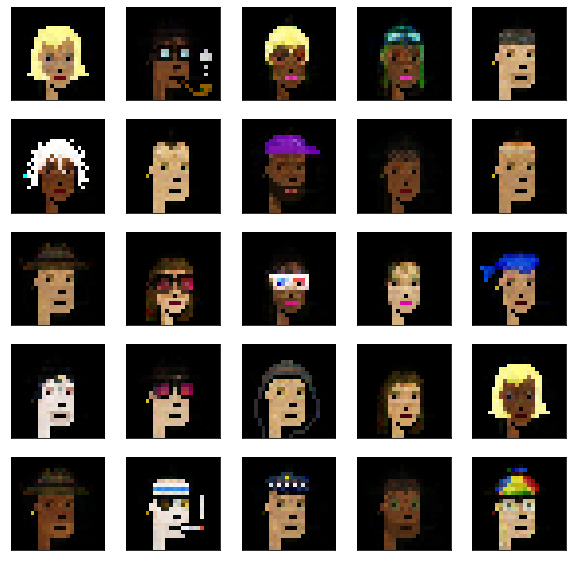

In [ ]:
test = autoED(x_test[0 : 25,:,:,:])
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test[i,:,:,:])

Let's look at the original test images for comparison.

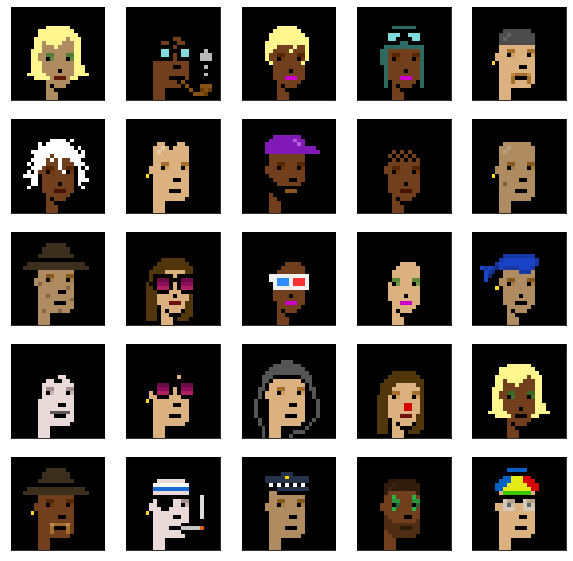

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i,:,:,:])

So now, we can store crypto punks as 64 numbers obtained from their original 1,728 numbers.